In [14]:
psrname='J1600-3053'

In [15]:
epta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/'+psrname+'/'
einpta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNA/'+psrname+'/'

In [2]:
# epta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/J1600-3053/TM_WN_DM26_SV138/ptmcmc/'
# einpta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNA/J1600-3053/TM_WN_RN21_DM148/ptmcmc/'

In [16]:
import os
dirs=[epta_dir,einpta_dir]
for hh in range(len(dirs)):
    
    with os.scandir(dirs[hh]) as entries:
        for entry in entries:
            dirs[hh]=dirs[hh]+entry.name+'/ptmcmc/'
epta_dir,einpta_dir=dirs

In [17]:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd

In [18]:
epta_1=np.loadtxt(epta_dir+'chain_1.txt')
par_epta=pd.read_csv(epta_dir+'pars.txt', header = None)
lep=len(par_epta)
epta_2=epta_1.T

In [19]:
einpta_1=np.loadtxt(einpta_dir+'chain_1.txt')
par_einpta=pd.read_csv(einpta_dir+'pars.txt', header = None)
leinp=len(par_einpta)
einpta_2=einpta_1.T

In [20]:
epta_arr=[epta_2[len(par_epta)-1],epta_2[len(par_epta)-2]]

einpta_arr=[einpta_2[len(par_einpta)-3],einpta_2[len(par_einpta)-4]]

In [21]:
names = ['logA','gamma']
labels=['\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

In [22]:
epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-1],names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-1],names = names,labels=labels,label='EPTA+INPTA \n'+psrname)

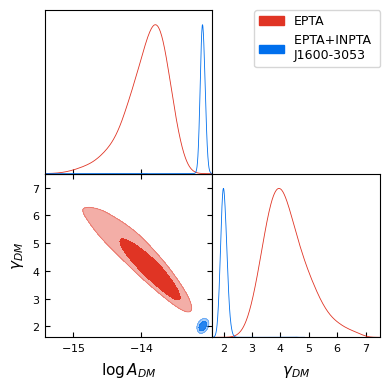

In [23]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_DM_SPNA.png',dpi=300)

In [24]:
from diff_chain import  Diff_chain_shift

In [25]:
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(epta,einpta)

In [26]:
nsig

3.431931164992037

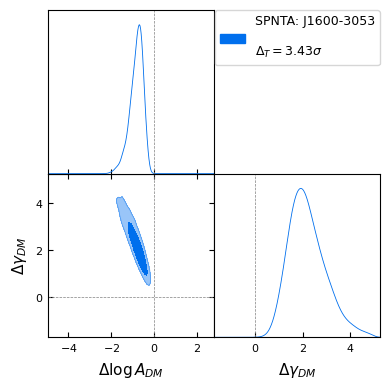

In [27]:
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = ['SPNTA: '+psrname+'\n\n$\Delta_T=$'+
                        str("{:.2f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff.png',dpi=300)